# Breast Cancer Prediction Model  

In this notebook, I built a logistic regression model that can classify breast cell samples as either malignant (cancerous) or benign (non-cancerous) using the Breast Cancer Wisconsin Dataset from Kaggle, containing 569 cell samples and 33 features.

### Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### Downloading the dataset

In [2]:
#download the dataset from kaggle
import opendatasets as od
od.download('https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data')

Skipping, found downloaded files in ".\breast-cancer-wisconsin-data" (use force=True to force download)


In [3]:
import os

data_dir = './breast-cancer-wisconsin-data'
os.listdir(data_dir)

['data.csv']

In [4]:
#Load the dataset
raw_df = pd.read_csv('./breast-cancer-wisconsin-data/data.csv')

In [5]:
pd.set_option('display.max_columns', None)
raw_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Data Exploration

In [6]:
raw_df.shape

(569, 33)

In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

No null values in the dataset except the last column.

In [8]:
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


Every feature is within its normal range.

In [9]:
raw_df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

Every column is numerical except diagnosis column. Diagnosis column has two categories  which are 'M' and 'B'.

In [10]:
raw_df.duplicated().sum()

0

No duplicate rows in the dataset so no need for its removal.

In [11]:
#dropping the column 'id' and 'Unnamed: 32'
raw_df = raw_df.drop(columns = ['id', 'Unnamed: 32'], axis=1)

In [12]:
raw_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The id column is just an identifier and Unnamed: 32 is empty so both are removed.

### Exploratory Data Analysis and Visualization

In [13]:
# Setting default parameters
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (10,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [14]:
%matplotlib inline

In [15]:
raw_df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

There is 31 columns in the dataset. In these columns, one is the target column 'diagnosis' and other 30 columns has 10 features regarding the cell with three types of values: mean, standard error and worst.  
Here, mean column shows the mean value of different values for that feature.  
Standard error column shows the error in that value.  
Worst column shows mean of the maximum values of that feature.

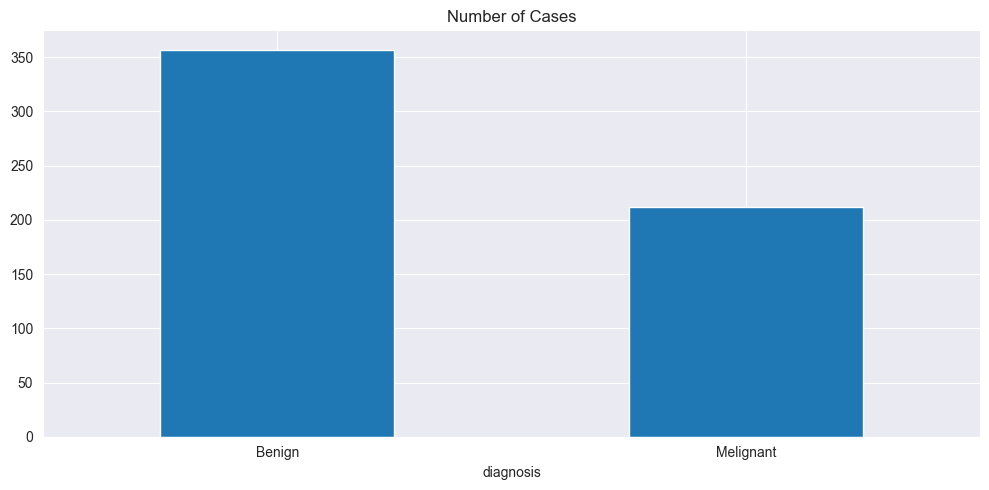

In [16]:
#bar plot of target column
raw_df['diagnosis'].value_counts().plot(kind='bar')
plt.xticks([0,1], ['Benign', 'Melignant'], rotation=0)
plt.title('Number of Cases')
plt.tight_layout()
plt.show()

In [17]:
raw_df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

This dataset has 212 malignant (cancerous) cells and 357 benign (non cancerous) cells. 37% -> M and 63% ->B  
From this, it is clear that there is imbalance in the dataset regarging the target column and it can cause more prediction of benign cells by the model.

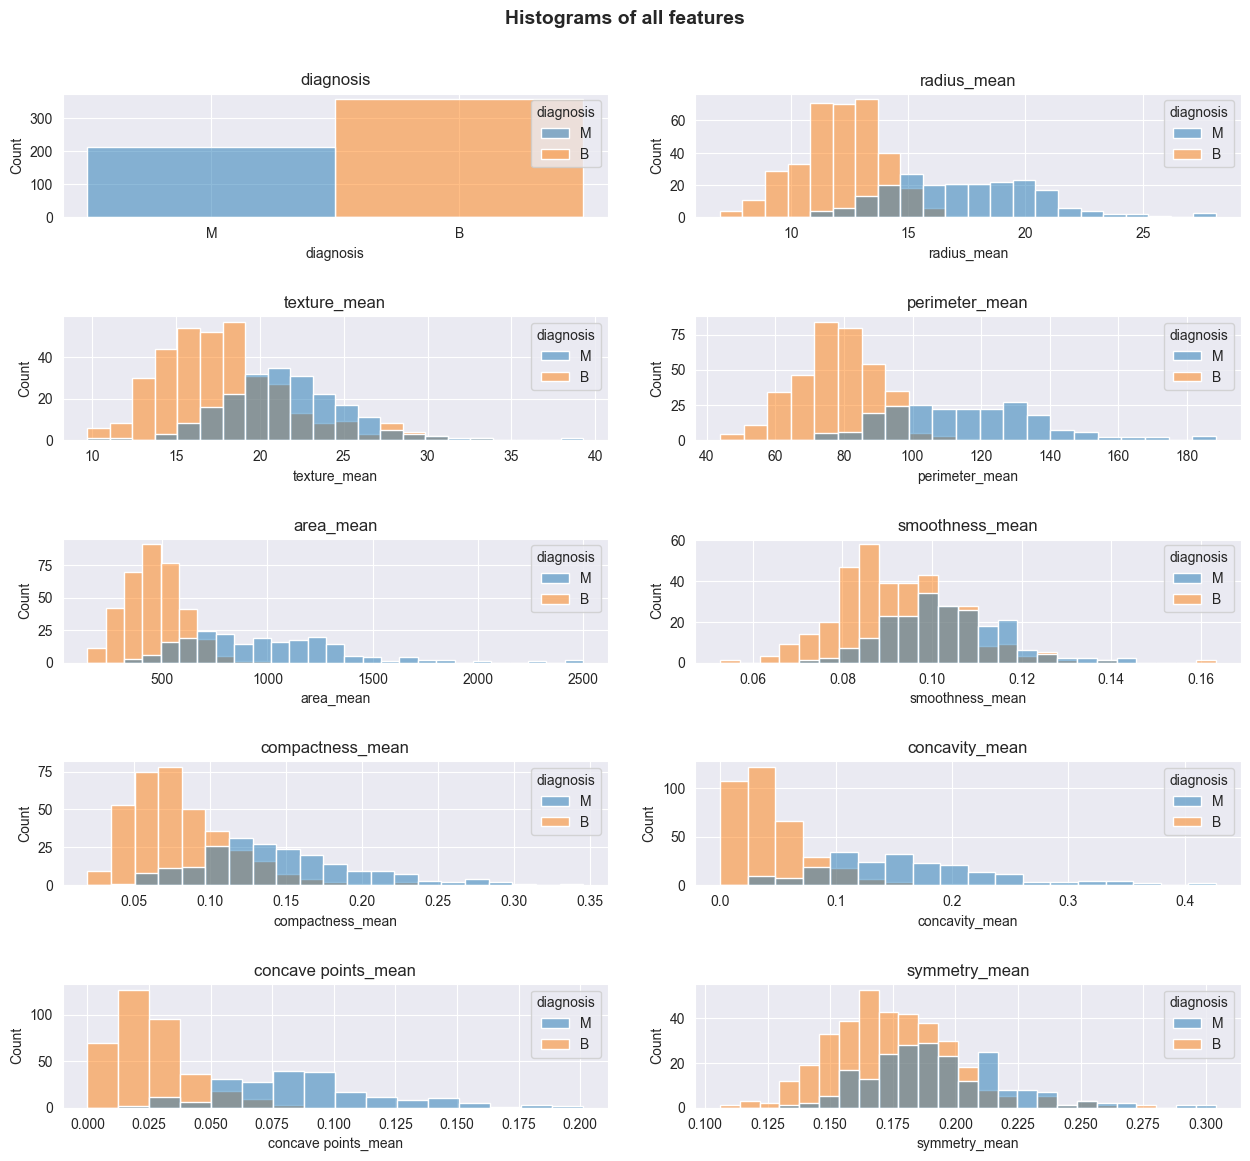

In [18]:
#histograms for all features
fig, axes = plt.subplots(5,2, figsize=(13,12))
axes = axes.flatten()

for ax, col in zip(axes, raw_df.columns[0:12]):
    sns.histplot(x=col, data=raw_df, hue='diagnosis', ax=ax)
    ax.set_title(col)

fig.suptitle('Histograms of all features', fontsize=14, fontweight='bold')
plt.tight_layout(pad=2.5)
plt.show()

From above figure we can say that:  
Malignant cells usually have big radius. With increase in the value of radius_mean, the possibility of the cell being cancerous also increases.  
Malignat cells also have high texture. With texture_mean having value 21, number of malignant cells are highest.  
Malignant cells have their peremeter around 100 to 140. With increase in the value of peremeter_mean, malignant cells also increase.  
Malignant cells also have bigger area compared to benign cells.  
With increase in the value of compactness_mean, concavity_mean and concave points_mean, number of malignant cells increase.

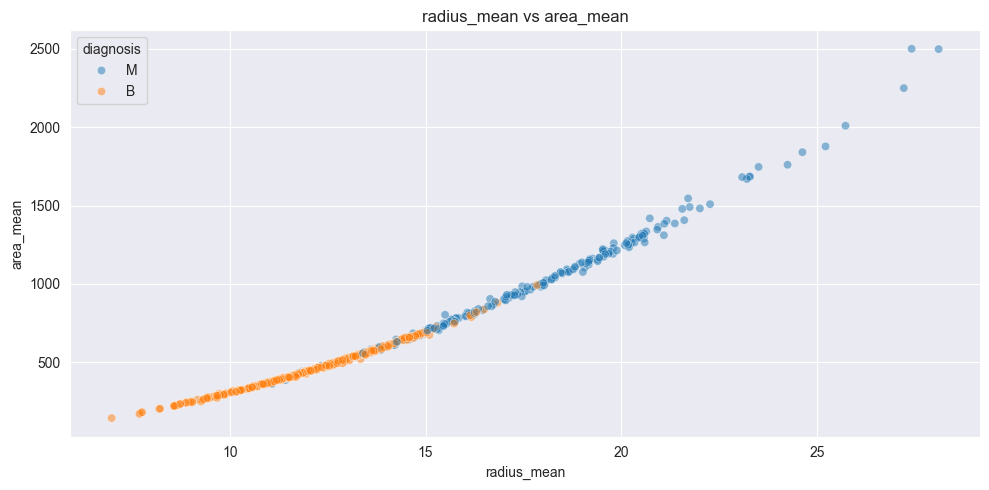

In [19]:
#scatter plot of radius_mean and area_mean
sns.scatterplot(x='radius_mean', y='area_mean',hue='diagnosis', data=raw_df, alpha=0.5)
plt.title('radius_mean vs area_mean')
plt.tight_layout()
plt.show()

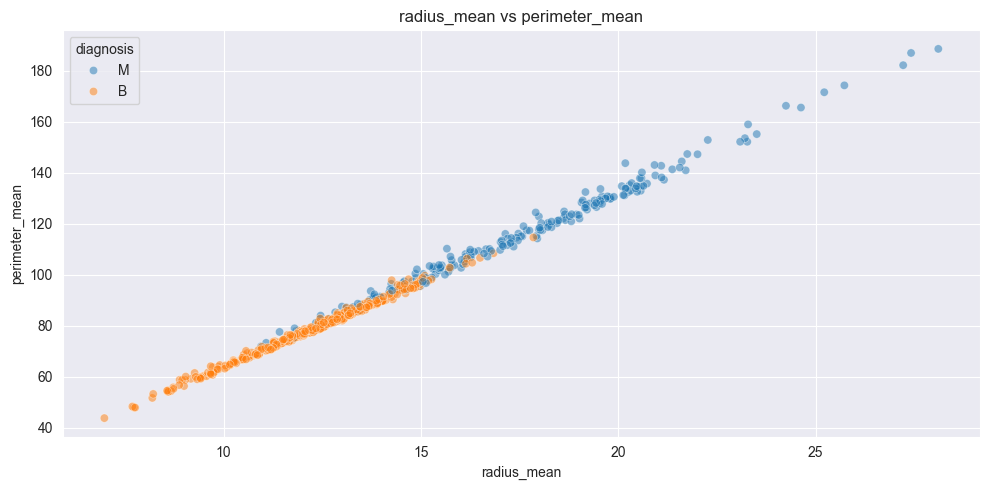

In [20]:
#scatter plot of radius_mean and perimeter_mean
sns.scatterplot(x='radius_mean', y='perimeter_mean',hue='diagnosis', data=raw_df, alpha=0.5)
plt.title('radius_mean vs perimeter_mean')
plt.tight_layout()
plt.show()

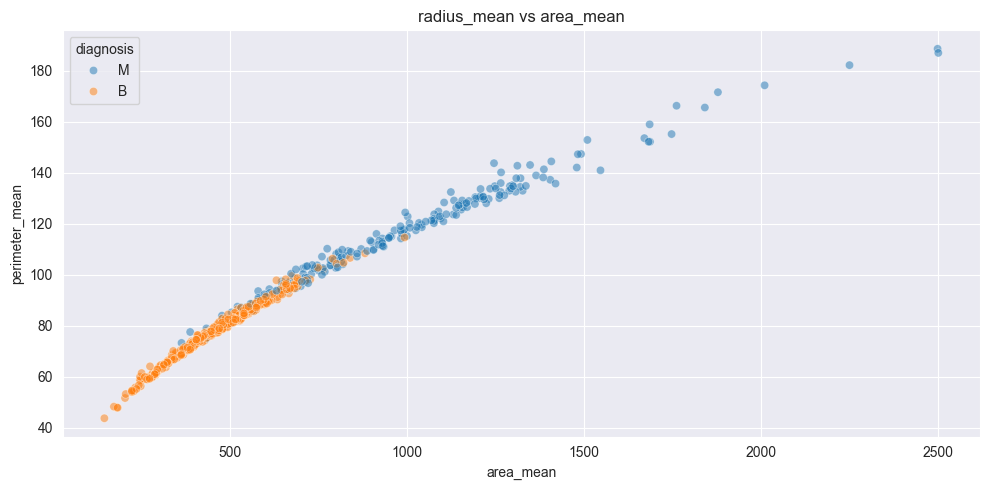

In [21]:
#scatter plot of area_mean and perimeter_mean
sns.scatterplot(x='area_mean', y='perimeter_mean', hue='diagnosis', data=raw_df, alpha=0.5)
plt.title('radius_mean vs area_mean')
plt.tight_layout()
plt.show()

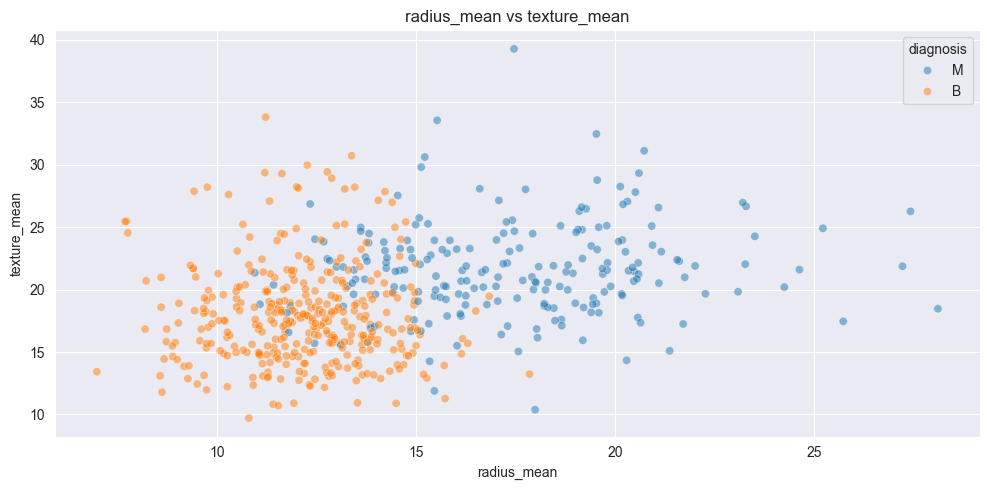

In [22]:
#scatter plot of radius_mean and texture_mean
sns.scatterplot(x='radius_mean', y='texture_mean',hue='diagnosis', data=raw_df, alpha=0.5)
plt.title('radius_mean vs texture_mean')
plt.tight_layout()
plt.show()

It can be seen from above plots that columns radius_mean, area_mean and perimeter_mean are dependent on each other.  
With increase in the value of one feature, other feature also increases.

It can also be seen that most of the data points are benign at lower value of the features and as the value of features increase, most of the data points are malignant.

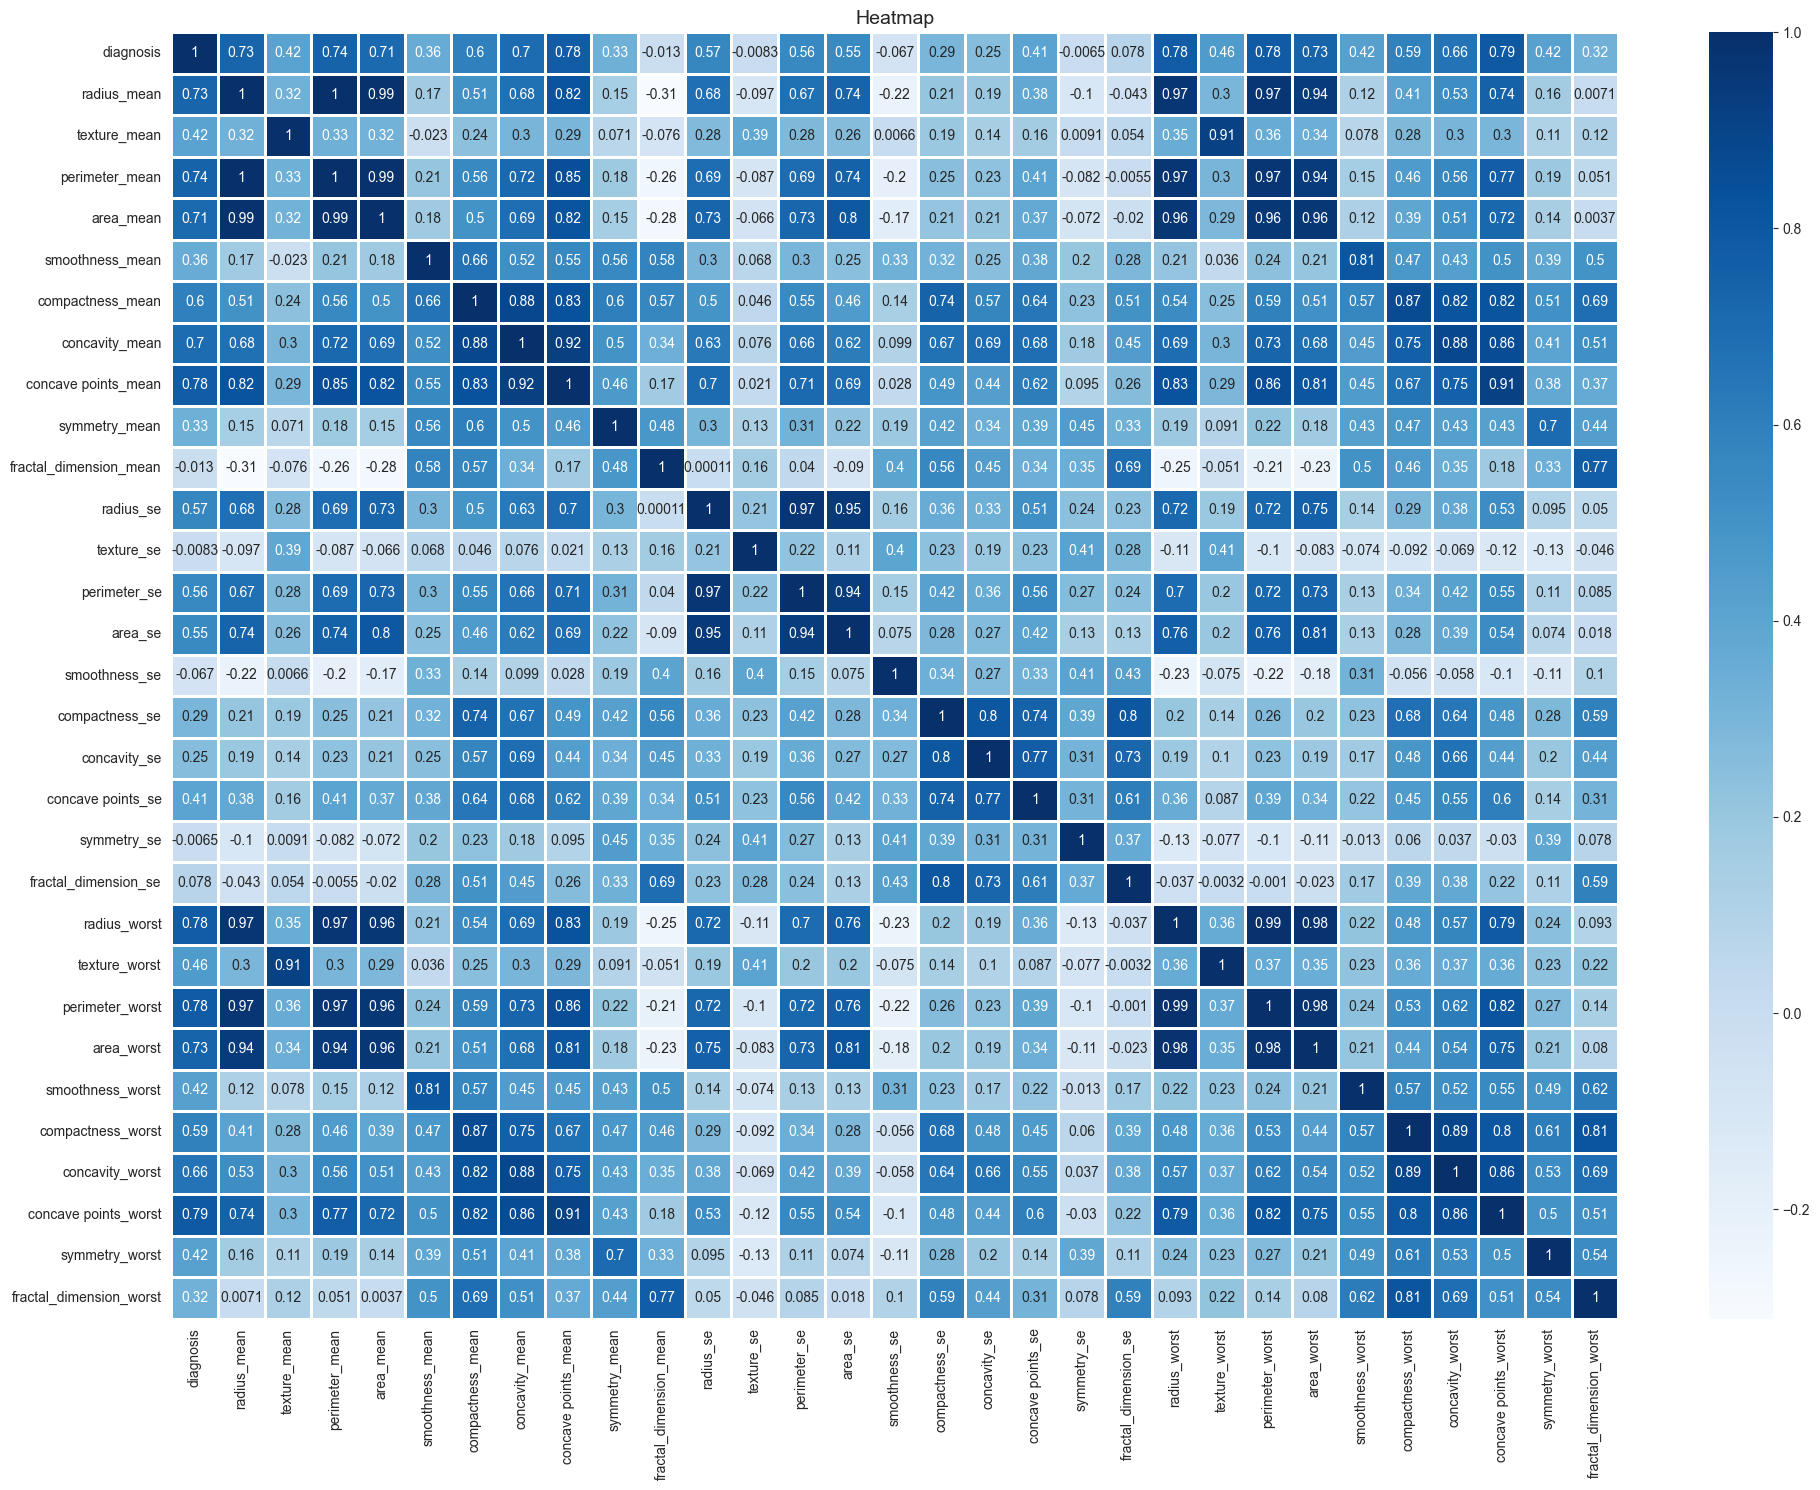

In [23]:
#encoding malignant as 1 and benign as 0 to convert diagnosis column to a numerical column
raw_df['diagnosis'] = raw_df['diagnosis'].map({'M':1, 'B':0})
num_df = raw_df.select_dtypes(include='number')

#heatmap of dateset
plt.figure(figsize=(20,15))
sns.heatmap(num_df.corr(), cmap='Blues', annot=True, linewidths=1, linecolor='w')
plt.title('Heatmap', fontsize=14)
plt.tight_layout()
plt.show()

Some features are highly correlated with each other.  
For the model to predict values efficiently, this high correlation cannot be neglected.  
This issue can be solved by keeping one feature from the group of highly correlated features and removing others.

From above heatmap, groups of features that have high correlation (more than 0.85) are:  
1. radius_mean, perimeter_mean, area_mean 
2. concavity_mean, concave points_mean
3. radius_se, perimeter_se, area_se 
4. radius_worst, perimeter_worst, area_worst with radius_mean, perimeter_mean, area_mean
5. texture_mean, texture_worst
6. concavity_worst, concavity_mean
7. concave points_worst, concavity_mean, concave points_mean
8. compactness_worst, concavity_worst, concave points_worst

From these groups,   
radius_mean column will be kept from group 1 and 4.  
radius_se column from group 3.  
texture_mean from group 5.  
concave points_mean from group 2 and 7.  
concavity_worst from group 6 and 8.

In [24]:
#dropping columns to reduce high correlation
drop_cols = ['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'texture_worst', 'concave points_worst', 'compactness_worst', 'concavity_mean']
raw_df = raw_df.drop(columns=drop_cols)

In [25]:
raw_df.shape

(569, 20)

Now there are only 20 columns in the dataset.

In [26]:
#displaying column names
raw_df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'concavity_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

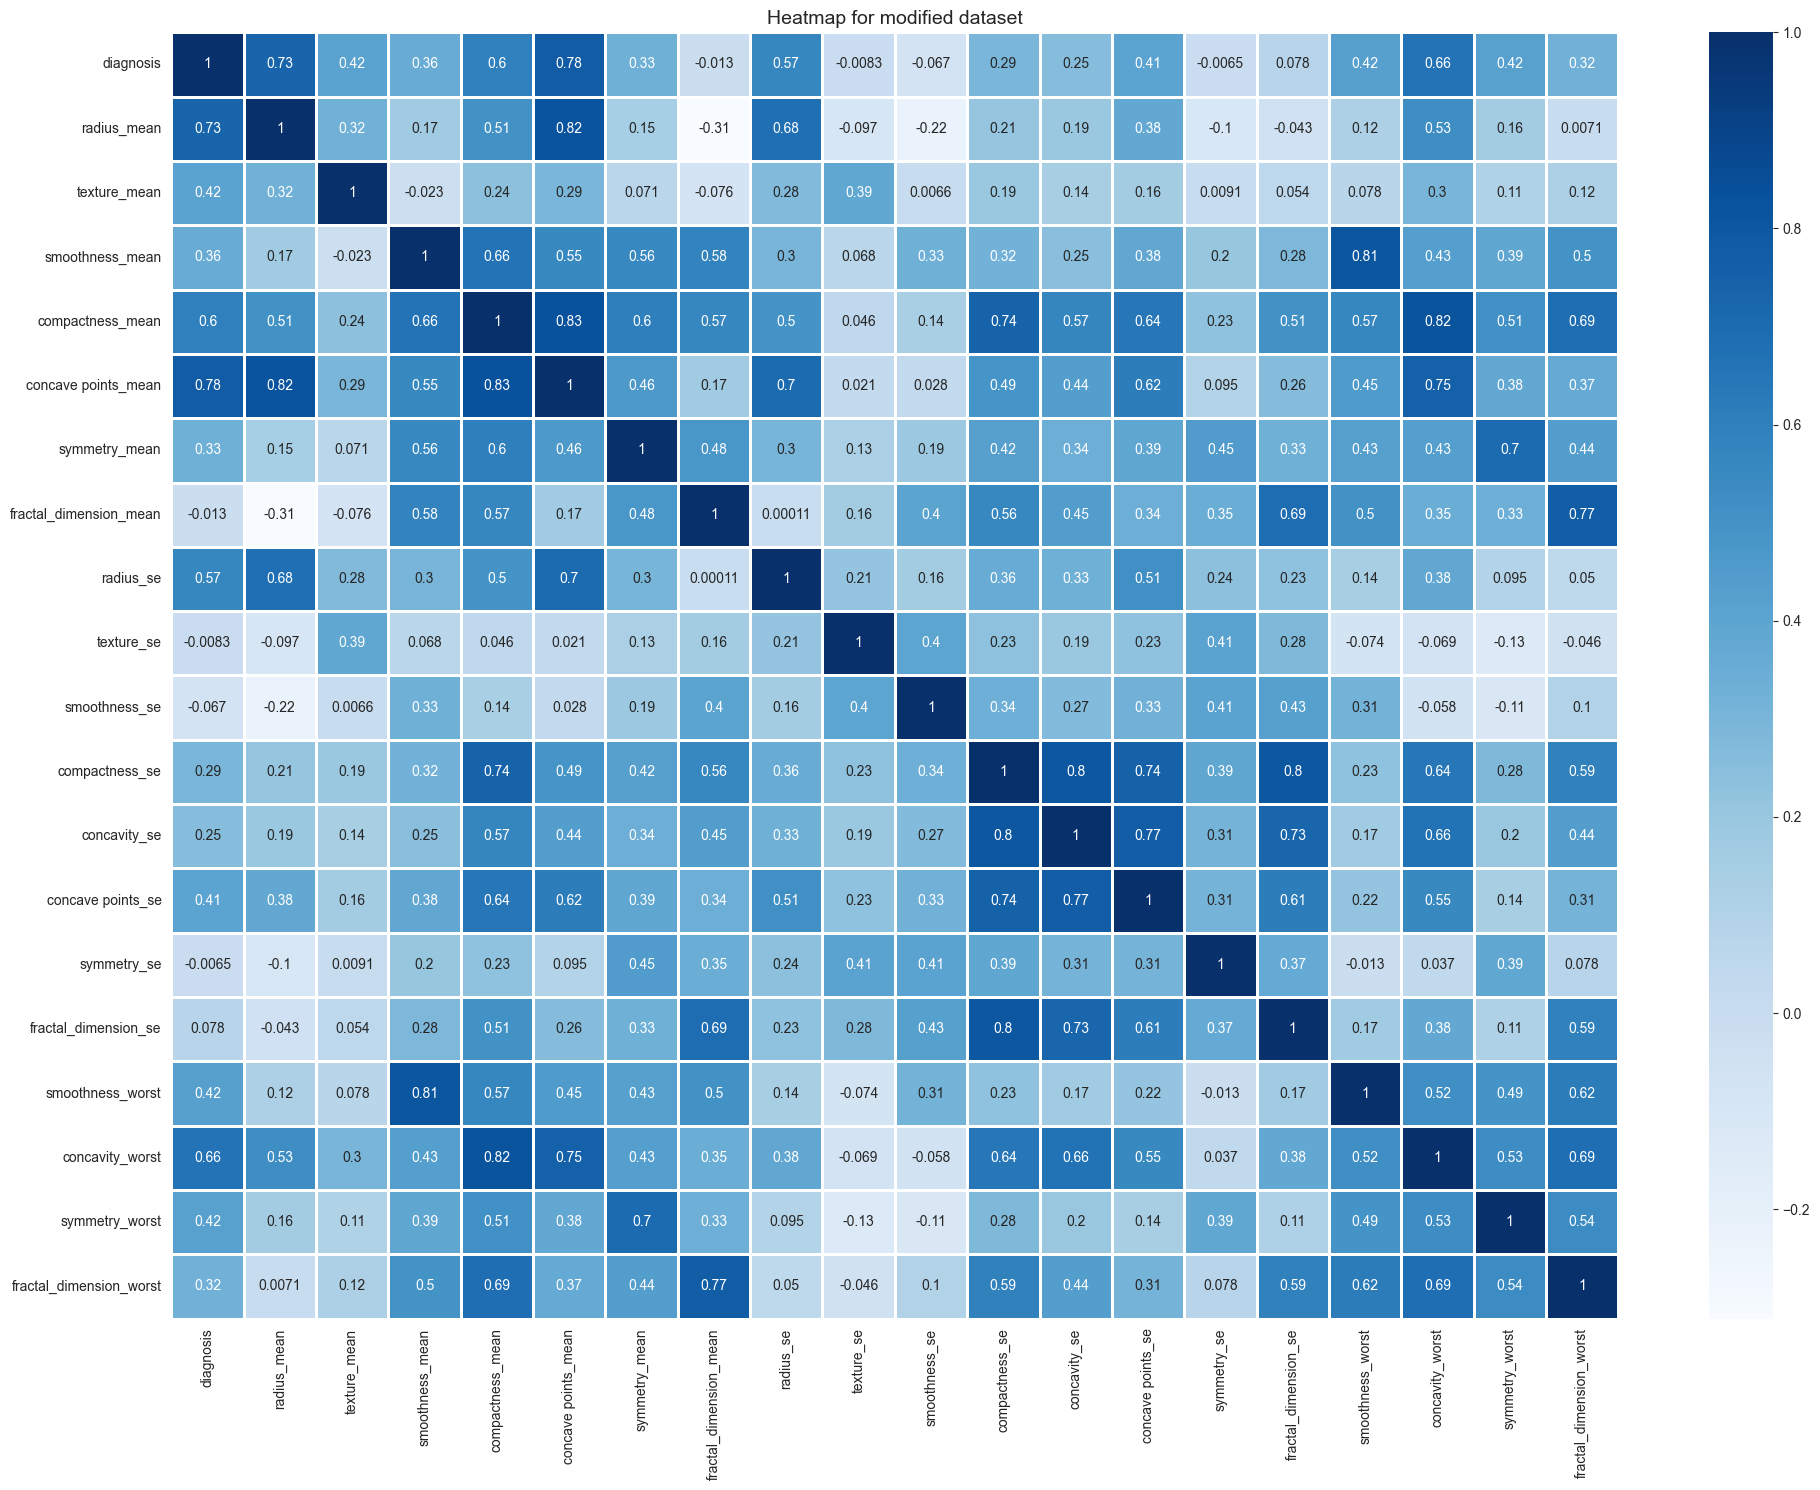

In [27]:
#heatmap after dropping the columns
plt.figure(figsize=(20,15))
sns.heatmap(raw_df.corr(), cmap='Blues', annot=True, linewidths=1, linecolor='w')
plt.title('Heatmap for modified dataset', fontsize=14)
plt.tight_layout()
plt.show()

Now there are no features with correlation more than 0.85.

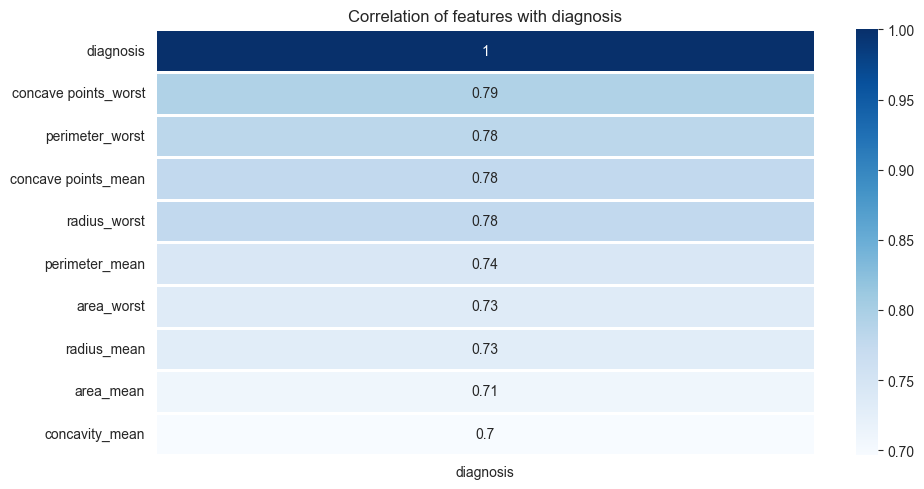

In [28]:
#10 features having the highest correlation with diagnosis column
corr_df = num_df.corr()[['diagnosis']].abs().sort_values(by='diagnosis', ascending=False)
sns.heatmap(corr_df.head(10), annot=True, cmap='Blues', linewidths=1, linecolor='w')
plt.title('Correlation of features with diagnosis')
plt.tight_layout()
plt.show()

### Splitting the Dataset into train and test

In [29]:
#dividing input columns and target columns
X = raw_df.drop(columns=['diagnosis'])
y = raw_df['diagnosis']

In [30]:
X.shape, y.shape

((569, 19), (569,))

In [31]:
print(type(X)), print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


(None, None)

In [32]:
#80% -> train data and 20% -> test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y) 

Using stratify=y to ensure train and test datasets have same class (diagnosis) proportion.

In [33]:
X_train.shape, X_test.shape

((455, 19), (114, 19))

In [34]:
X_train.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
10,16.02,23.24,0.08206,0.06669,0.03323,0.1528,0.05697,0.3795,1.1870,0.004029,0.009269,0.01101,0.007591,0.01460,0.003042,0.11810,0.1459,0.2948,0.08452
170,12.32,12.39,0.10280,0.06981,0.03700,0.1959,0.05955,0.2360,0.6656,0.008045,0.011800,0.01683,0.012410,0.01924,0.002248,0.13850,0.1242,0.2827,0.06771
407,12.85,21.37,0.07551,0.08316,0.01867,0.1580,0.06114,0.4993,1.7980,0.006011,0.044800,0.05175,0.013410,0.02669,0.007731,0.09402,0.1838,0.2488,0.08151
430,14.90,22.53,0.09947,0.22250,0.09711,0.2041,0.06898,0.2530,0.8749,0.006965,0.062130,0.07926,0.022340,0.01499,0.005784,0.14190,0.9019,0.2866,0.11550
27,18.61,20.25,0.09440,0.10660,0.07731,0.1697,0.05699,0.8529,1.8490,0.010750,0.027220,0.05081,0.019110,0.02293,0.004217,0.13380,0.3446,0.2341,0.07421


No null value and no categorical columns, so no need of imputing and one hot encoding

### Scaling the features

In [35]:
pd.set_option('display.max_columns',None)
raw_df.describe()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,0.096360,0.104341,0.048919,0.181162,0.062798,0.405172,1.216853,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,0.132369,0.272188,0.290076,0.083946
std,0.483918,3.524049,4.301036,0.014064,0.052813,0.038803,0.027414,0.007060,0.277313,0.551648,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,0.022832,0.208624,0.061867,0.018061
min,0.000000,6.981000,9.710000,0.052630,0.019380,0.000000,0.106000,0.049960,0.111500,0.360200,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,0.071170,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,0.086370,0.064920,0.020310,0.161900,0.057700,0.232400,0.833900,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,0.116600,0.114500,0.250400,0.071460
50%,0.000000,13.370000,18.840000,0.095870,0.092630,0.033500,0.179200,0.061540,0.324200,1.108000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,0.131300,0.226700,0.282200,0.080040
75%,1.000000,15.780000,21.800000,0.105300,0.130400,0.074000,0.195700,0.066120,0.478900,1.474000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,0.146000,0.382900,0.317900,0.092080
max,1.000000,28.110000,39.280000,0.163400,0.345400,0.201200,0.304000,0.097440,2.873000,4.885000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,0.222600,1.252000,0.663800,0.207500


Some columns have different ranges so scaling is required.

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
#Creating scaler
scaler = StandardScaler()

In [38]:
#Fit the scaler on X_train and transfrom train and test dataset
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns, index=X_test.index)

In [39]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,455.0,-1.737316e-16,1.001101,-2.009730,-0.686986,-0.231061,0.494783,3.900239
texture_mean,455.0,3.904081e-16,1.001101,-2.265011,-0.719258,-0.120789,0.562843,4.634299
smoothness_mean,455.0,7.242070e-16,1.001101,-2.342455,-0.759968,-0.052676,0.623134,4.715773
compactness_mean,455.0,-5.075305e-17,1.001101,-1.568307,-0.744645,-0.214571,0.492380,4.485809
concave points_mean,455.0,2.928061e-17,1.001101,-1.236420,-0.739855,-0.395400,0.632163,3.838961
symmetry_mean,455.0,2.342449e-17,1.001101,-2.733834,-0.704202,-0.057834,0.503438,4.435961
fractal_dimension_mean,455.0,3.669836e-16,1.001101,-1.791603,-0.729551,-0.203192,0.524949,4.987148
radius_se,455.0,1.678755e-16,1.001101,-1.033890,-0.612485,-0.289057,0.254646,8.493000
texture_se,455.0,-8.979386e-17,1.001101,-1.554603,-0.681672,-0.142979,0.466949,6.646884
smoothness_se,455.0,-1.561632e-16,1.001101,-1.817396,-0.638005,-0.222430,0.401283,8.499034


Mean is zero and standard deviation is one after scaling for all features.

### Baseline Model -> Dummy Classifier 

In [40]:
from sklearn.dummy import DummyClassifier

In [41]:
dummy = DummyClassifier(strategy='most_frequent') #predicts benign (0) everytime
dummy.fit(X_train, y_train)

,strategy,'most_frequent'
,random_state,None
,constant,None


In [42]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

#function to evaluate model
def evaluate_model(target, predictions):
    print('Recall Score: ', recall_score(target, predictions))
    print('Precision Score: ', precision_score(target, predictions))
    print('F1 Score: ', f1_score(target, predictions))
    print('Accuracy: ', accuracy_score(target, predictions))

In [43]:
#predict the result
y_dummy_pred = dummy.predict(X_train)

print('Precision Score: ', precision_score(y_dummy_pred, y_train))
print('Accuracy: ', accuracy_score(y_dummy_pred, y_train))

Precision Score:  0.0
Accuracy:  0.6263736263736264


62% accuracy by the baseline model which means it missed all of the melignant cases.

### Model Training

In [44]:
from sklearn.linear_model import LogisticRegression

#fit and train model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

#predict the values and evaluate model
train_pred = model.predict(X_train)
evaluate_model(y_train, train_pred)

Recall Score:  0.9647058823529412
Precision Score:  0.9939393939393939
F1 Score:  0.9791044776119403
Accuracy:  0.9846153846153847


This model has 98% accuracy.   
When it predicts cancerous (malignant) cells, it is correct 99% of the time (precision_score = 0.99).   
Model identifies 96% of all cancer cases (recall_score = 0.96).

In [45]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, train_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[284   1]
 [  6 164]]


Model predicted 284 cells benign which were actually benign.  
It predicted 1 cell as malignant which was actually benign (false positive).  
It predicted 164 cells malignant which were actually malignant.  
It predicted 6 cells benign which were actually malignant (false negative).

In [46]:
#prediction for test dataset
test_preds = model.predict(X_test)
evaluate_model(y_test, test_preds)

Recall Score:  0.9285714285714286
Precision Score:  1.0
F1 Score:  0.9629629629629629
Accuracy:  0.9736842105263158


In [47]:
cm = confusion_matrix(y_test, test_preds)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[72  0]
 [ 3 39]]


<Figure size 600x600 with 0 Axes>

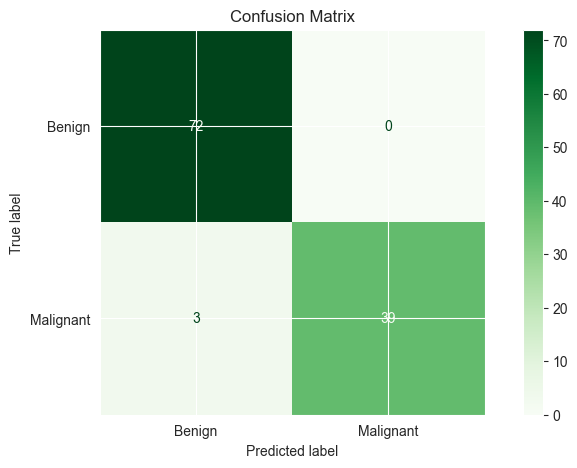

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(6,6))
ConfusionMatrixDisplay(cm, display_labels=['Benign','Malignant']).plot(cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

For the test dataset, model accuracy is 97% with precision score 1.  
This means that for test dataset, model didn't predict any cell as malignant which is actually benign; This means that it doesn't predict a cell which wasn't actually cancerous as cancerous cell (false positive).  

Though it doesn't predict any false positives, there are some cells which are cancerous and is predicted as non cancerous (false negative). For the test dataset, there are three cases like this.  
False negatives are dangerous: if the model misses a cancerous cell, the patient may not receive needed treatment and it can cause serious issues.

In [49]:
#weights of featues in the trained model
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'coef': model.coef_.flatten()
})
coef_df.sort_values(ascending=False, by='coef').head(7)

,Feature,coef
7,radius_se,2.038519
0,radius_mean,1.933652
4,concave points_mean,1.869107
17,symmetry_worst,1.416539
16,concavity_worst,1.406303
1,texture_mean,1.332595
12,concave points_se,0.610334


It can be seen that features radius_se, radius_mean and concave points_mean have the highest weights. These features have stronger impact on predicting whether the cell is cancerous or not.

In [50]:
#saving model and scaler
import joblib
joblib.dump(model, '../artifacts/breast_cancer_model.pkl')
joblib.dump(scaler, '../artifacts/scaler.joblib')

['../artifacts/scaler.joblib']